In [12]:
"""
Tesseract-ocr 설치하기

1. tesseract-ocr-w64-setup-v5.0.0-alpha.20191030.exe 파일 다운로드 
   (https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v5.0.0-alpha.20200328.exe)
2. 설치 시 "Additional script data" 항목에서 "Hangul Script", "Hangul vertical script" 항목 체크,
   "Additional language data" 항목에서 "Korean" 항목 체크.
4. 설치 후 시스템 환경변수 PATH에 Tesseract 설치 폴더 추가
   (e.g.) c:\Program Files\Tesseract-OCR
4. 설치 후 시스템 환경변수에 TESSDATA_PREFIX를 추가하고, 변수 값을 <Tesseract-DIR>\tessdata 로 설정
5. <Tesseract-DIR>\tessdata\script\ 폴더에 있는 Hangul.traineddata, Hangul_vert.traineddata 파일을
   <Tesseract-DIR>\tessdata\ 폴더로 복사
6. 명령 프롬프트 창에서 pip install pytesseract 명령 입력
"""

import sys
import numpy as np
import cv2
import pytesseract


def reorderPts(pts):
    idx = np.lexsort((pts[:, 1], pts[:, 0]))  # 칼럼0 -> 칼럼1 순으로 정렬한 인덱스를 반환
    pts = pts[idx]  # x좌표로 정렬

    if pts[0, 1] > pts[1, 1]:
        pts[[0, 1]] = pts[[1, 0]]

    if pts[2, 1] < pts[3, 1]:
        pts[[2, 3]] = pts[[3, 2]]

    return pts


# 영상 불러오기
filename = 'namecard1.jpg'

src = cv2.imread(filename)

if src is None:
    print('Image load failed!')
    sys.exit()

# 출력 영상 설정
dw, dh = 720, 400
srcQuad = np.array([[0, 0], [0, 0], [0, 0], [0, 0]], np.float32)
dstQuad = np.array([[0, 0], [0, dh], [dw, dh], [dw, 0]], np.float32)
dst = np.zeros((dh, dw), np.uint8)

# 입력 영상 전처리
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
th, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 외곽선 검출 및 명함 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for pts in contours:
    # 너무 작은 객체는 제외
    if cv2.contourArea(pts) < 10:
        continue

    # 외곽선 근사화
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    # 컨벡스가 아니면 제외
    if not cv2.isContourConvex(approx) or len(approx) != 4:
        continue

    print('approx len : ', len(approx))

    cv2.polylines(src, [approx], True, (0, 255, 0), 2, cv2.LINE_AA)
    srcQuad = reorderPts(approx.reshape(4, 2).astype(np.float32))

    pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
    dst = cv2.warpPerspective(src, pers, (dw, dh), flags=cv2.INTER_CUBIC)

    dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    print(pytesseract.image_to_string(dst_rgb, lang='Hangul+eng'))

cv2.imshow('src', src)
cv2.imshow('src_gray', src_gray)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

approx len :  4
황 선 규 (Sunkyoo Hwang)

IT 전문서 저자 / IT 강사 / 공 학 박사

#OpenCV #Computer Vision
#Deep Learning #Algorithm

sunkyoo.hwang@gmail.com
https://sunkyoo.github.io/

 

 

approx len :  4



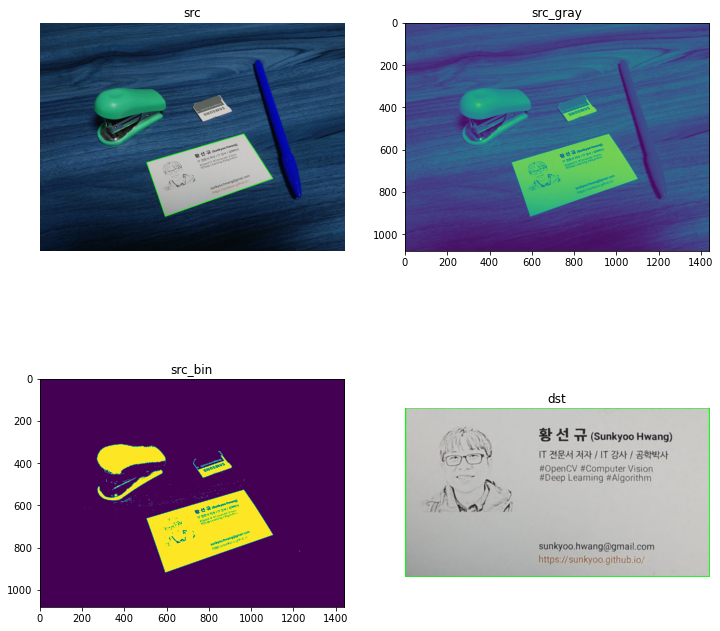

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (12, 12))

ax[0, 0].imshow(src);     ax[0, 0].set_title('src');     plt.axis('off');ax[0, 0].axis('off')
ax[0, 1].imshow(src_gray); ax[0, 1].set_title('src_gray'); plt.axis('off');ax[0, 0].axis('off')
ax[1, 0].imshow(src_bin);    ax[1, 0].set_title('src_bin');     plt.axis('off');ax[0, 0].axis('off')
ax[1, 1].imshow(dst);    ax[1, 1].set_title('dst');     plt.axis('off');ax[0, 0].axis('off')

plt.show()

__위의 dst 그림에 pytesseract써서, 글씨 인식하는듯 ?__
- namecard3.jpg로 하면, 마지막 dst그림이 잘 보이지만 다른 그림을 쓰면 테서랙트를 써서 문자 추출은 잘 되는데, dst그림 깨져서나옴

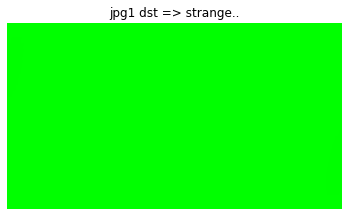

In [15]:
plt.imshow(dst_)    
plt.title('jpg1 dst => strange..')    
plt.axis('off')
plt.show()

그래도 결과는 잘 나옴